In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit
import metropolis
import metropolis_mod
rng = np.random.default_rng()

2.269185314213022


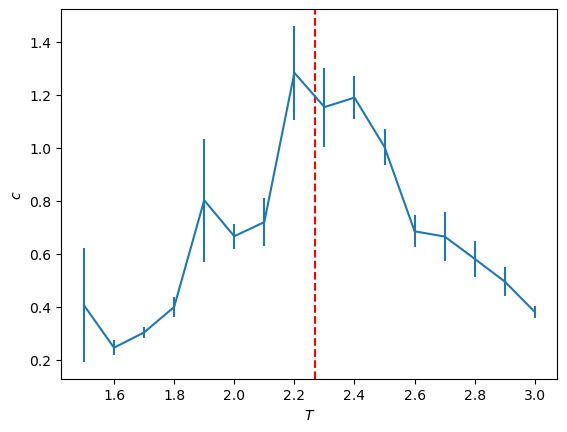

In [2]:
#a
%run metropolis.py


In [5]:
    T_range = np.arange(3, 1.5, 0.1)  # temperatures of interest
    C_list = metropolis.run(
        T_range=T_range,
        L=10,                      # system size
        N_sweeps=10_000,           # number of sweeps
        N_eq=1_000,                # Number of equilibration steps before the measurements start
        N_flips=10,                # Number of steps between measurements
        N_bins=10,                 # Number of bins used for the error analysis
    )[1]

In [6]:
#a
plt.errorbar(T_range, C_list[:, 0], C_list[:, 1], fmt='o', capsize=2)
Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.xlabel('$T$')
plt.legend()
plt.ylabel('$c$')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### the script plots following:

the __specific heat__ per spin vs __Temperature__
$$ C(T) = \frac{1}{T^2L^2} * \Delta{E} $$

$\Delta{E} = \braket{E^2}-{\braket{E}}^2 $

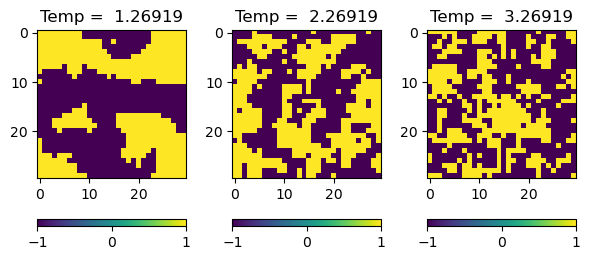

In [5]:
#b

T_list= [Tc-1,Tc,Tc+1]
plt.figure(figsize=(2*len(T_list),len(T_list)))
for i in range(len(T_list)):
    system = metropolis.prepare_system(30,rng)
    t=T_list[i]
    metropolis.metropolis_loop(system,t,10000,1000,10,rng)
    plt.subplot(1,len(T_list),i+1)
    plt.imshow(system)
    plt.title(f'Temp = {t: .5f}')
    plt.colorbar(location='bottom')
    

plt.tight_layout()

plt.show()

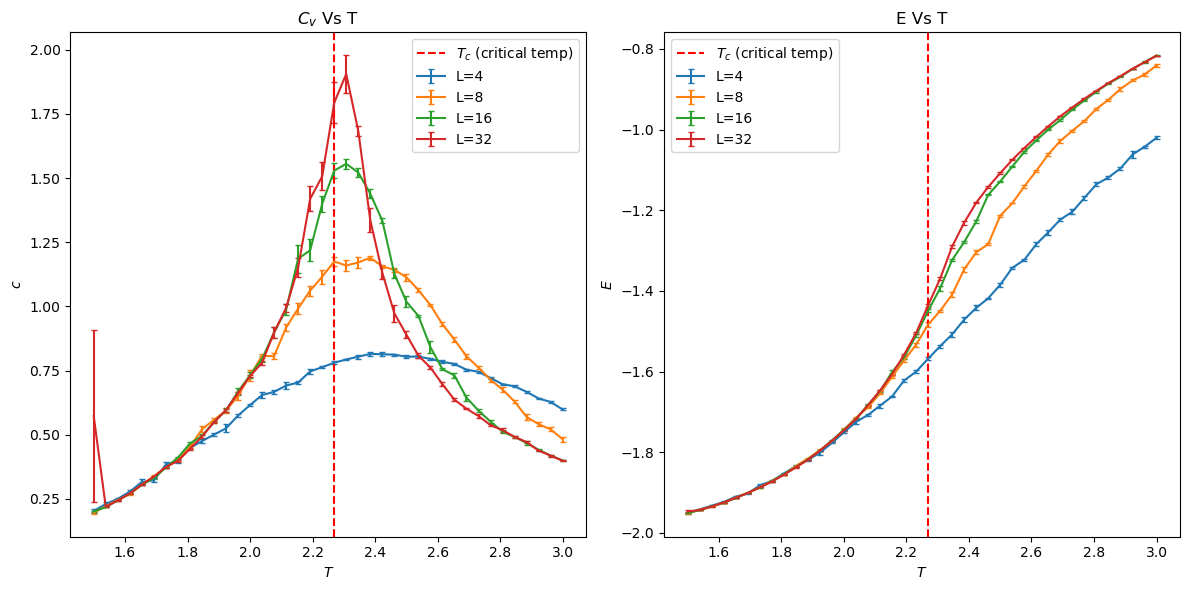

In [6]:
#c

L_list =[4,8,16,32]
T_range = np.linspace(1.5,3. , 40)
Tc = 2. / np.log(1. + np.sqrt(2))
plt.figure(figsize=(12,6))
for i in range(len(L_list)):
    l =L_list[i]
    #system= metropolis.prepare_system(l,rng)
    E,c = metropolis.run(T_range,l,10000*l**2,1000,5,10,rng)
    plt.subplot(1,2,1)
    plt.errorbar(T_range, c[:, 0], c[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(1,2,2)
    plt.errorbar(T_range, E[:, 0], E[:, 1], fmt='-', capsize=2, label=f'L={l}')

plt.subplot(1,2,1)
plt.xlabel('$T$')
plt.ylabel('$c$')
plt.title(r'$C_v$ Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('$T$')
plt.ylabel('$E$')
plt.title(r'E Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()


plt.tight_layout()
plt.show()

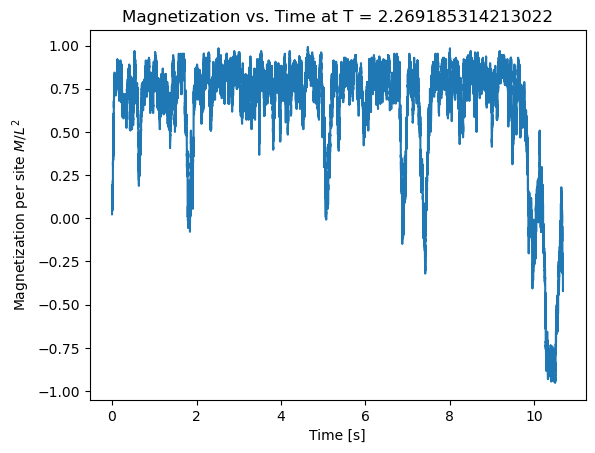

In [35]:
#d
T = Tc
L = 16
N_sweeps = 1000000
N_eq = 100
N_flips = 10
rng = np.random.default_rng()

system = metropolis.prepare_system(L, rng)
Es, Ms, times = metropolis_mod.metropolis_loop_mod_timed(system, T, N_sweeps, N_eq, N_flips, rng)

plt.plot(times, Ms / L**2)
plt.xlabel('Time [s]')
plt.ylabel('Magnetization per site $M / L^2$')
plt.title(f'Magnetization vs. Time at T = {T}')
plt.show()

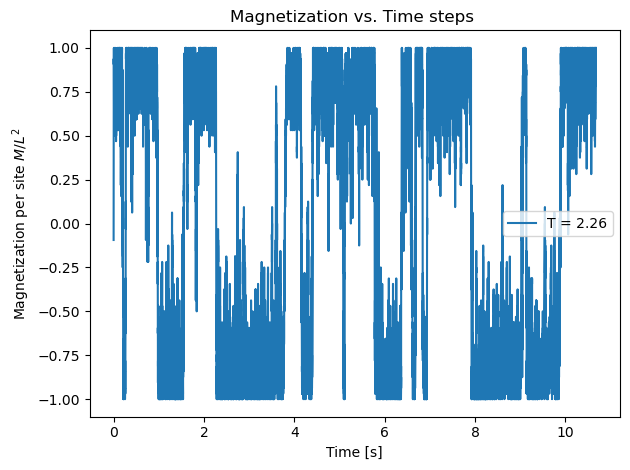

In [29]:
#d
T_list = [2.26]
L = 8
N_sweeps = 1000000
N_eq = 10
N_flips = 10
rng = np.random.default_rng()

plt.figure()

for temp in T_list:
    system = metropolis.prepare_system(L, rng)  # Not metropolis.prepare_system
    Es, Ms, times = metropolis_mod.metropolis_loop_mod_timed(system, temp, N_sweeps, N_eq, N_flips, rng)
    plt.plot(times, Ms/L**2 , label=f'T = {temp:.2f}')

plt.xlabel('Time [s]')
plt.ylabel('Magnetization per site $M / L^2$')
plt.title('Magnetization vs. Time steps ')
plt.legend()

plt.tight_layout()
plt.show()


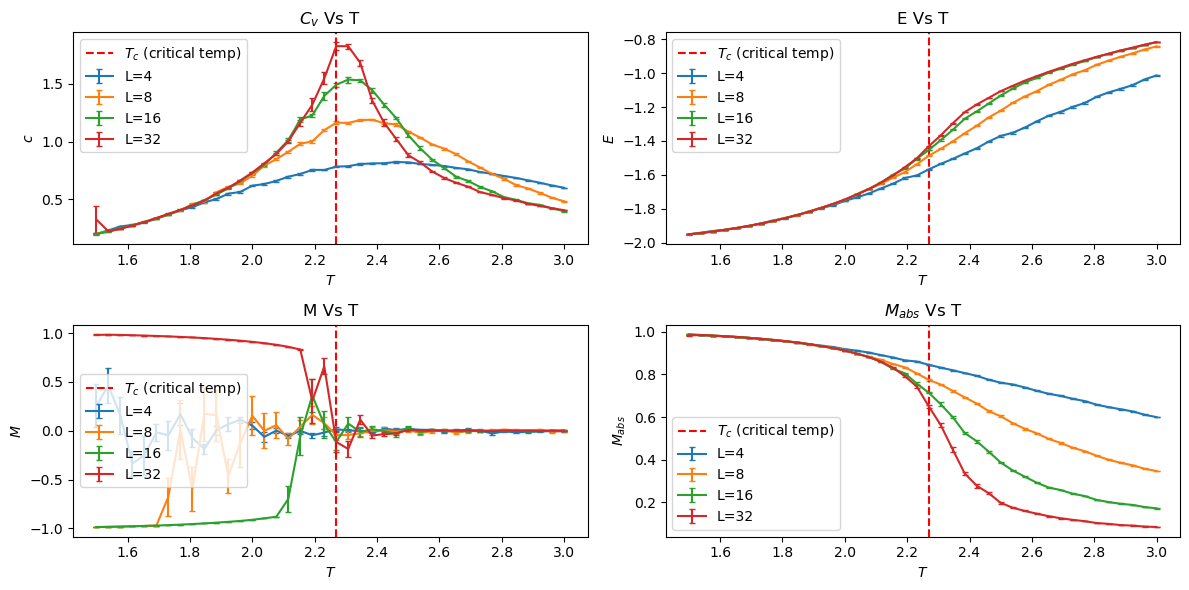

In [17]:
#d

L_list =[4,8,16,32]
T_range = np.linspace(3,1.5 , 40)
Tc = 2. / np.log(1. + np.sqrt(2))
plt.figure(figsize=(12,6))
for i in range(len(L_list)):
    l =L_list[i]
    t0=time.time()
    #system= metropolis.prepare_system(l,rng)
    E,c,ml,mal = metropolis_mod.run_mod(T_range,l,10000*l**2,1000,10,10,rng)
    plt.subplot(2,2,1)
    plt.errorbar(T_range, c[:, 0], c[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,2)
    plt.errorbar(T_range, E[:, 0], E[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,3)
    plt.errorbar(T_range, ml[:, 0], ml[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,4)
    plt.errorbar(T_range, mal[:, 0], mal[:, 1], fmt='-', capsize=2, label=f'L={l}')

plt.subplot(2,2,1)
plt.xlabel('$T$')
plt.ylabel('$c$')
plt.title(r'$C_v$ Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('$T$')
plt.ylabel('$E$')
plt.title(r'E Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()
plt.subplot(2,2,3)
plt.xlabel('$T$')
plt.ylabel('$M$')
plt.title(r'M Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()
plt.subplot(2,2,4)
plt.xlabel('$T$')
plt.ylabel('$M_{abs}$')
plt.title(r'$M_{abs}$ Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()


plt.tight_layout()
plt.show()
    

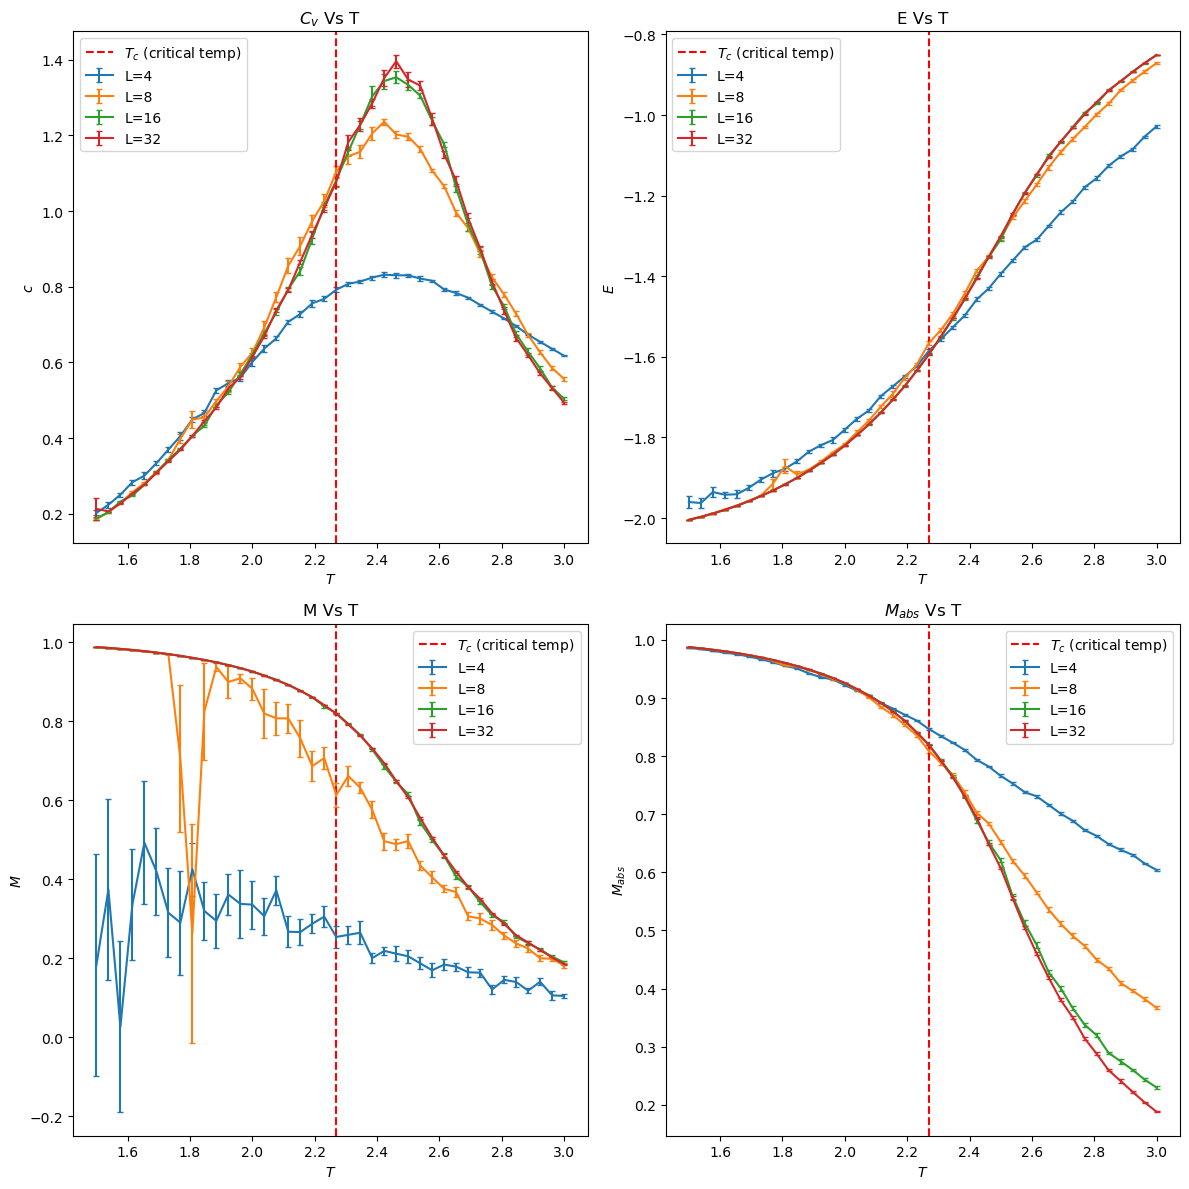

In [9]:
#e

h = 0.1
L_list =[4,8,16,32]
T_range = np.linspace(1.5,3. , 40)
Tc = 2. / np.log(1. + np.sqrt(2))
plt.figure(figsize=(12,12))
for i in range(len(L_list)):
    l =L_list[i]
    #system= metropolis.prepare_system(l,rng)
    E,c,ml,mal = metropolis_mod.run_e(T_range,l,10000*l**2,1000,10,10,h,rng)
    plt.subplot(2,2,1)
    plt.errorbar(T_range, c[:, 0], c[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,2)
    plt.errorbar(T_range, E[:, 0], E[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,3)
    plt.errorbar(T_range, ml[:, 0], ml[:, 1], fmt='-', capsize=2, label=f'L={l}')
    plt.subplot(2,2,4)
    plt.errorbar(T_range, mal[:, 0], mal[:, 1], fmt='-', capsize=2, label=f'L={l}')

plt.subplot(2,2,1)
plt.xlabel('$T$')
plt.ylabel('$c$')
plt.title(r'$C_v$ Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('$T$')
plt.ylabel('$E$')
plt.title(r'E Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()
plt.subplot(2,2,3)
plt.xlabel('$T$')
plt.ylabel('$M$')
plt.title(r'M Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()
plt.subplot(2,2,4)
plt.xlabel('$T$')
plt.ylabel('$M_{abs}$')
plt.title(r'$M_{abs}$ Vs T')
plt.axvline(Tc, color='r', linestyle='--', label=r'$T_{c}$ (critical temp)')
plt.legend()


plt.tight_layout()
plt.show()
    